In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [35]:
df_steam_games = pd.read_parquet('df_steam_games_limpio_final.parquet')

Descripción general del Dataframe df_steam_games

In [44]:
df_steam_games.head(7)

,genres,app_name,tags,specs,price,id,developer,anio
0,action,lost summoner kitty,strategy,single player,4.99,761140,kotoshiro,2018
1,action,lost summoner kitty,action,single player,4.99,761140,kotoshiro,2018
2,action,lost summoner kitty,indie,single player,4.99,761140,kotoshiro,2018
3,action,lost summoner kitty,casual,single player,4.99,761140,kotoshiro,2018
4,action,lost summoner kitty,simulation,single player,4.99,761140,kotoshiro,2018
5,casual,lost summoner kitty,strategy,single player,4.99,761140,kotoshiro,2018
6,casual,lost summoner kitty,action,single player,4.99,761140,kotoshiro,2018


In [36]:
df_steam_games.columns

Index(['genres', 'app_name', 'tags', 'specs', 'price', 'id', 'developer',
       'anio'],
      dtype='object')

In [37]:
df_steam_games.dtypes

genres        object
app_name      object
tags          object
specs         object
price        float64
id             int32
developer     object
anio           int32
dtype: object

In [38]:
df_steam_games.describe(include='all') 

,genres,app_name,tags,specs,price,id,developer,anio
count,2020049,2020049,2020049,2020049,2.020049e+06,2.020049e+06,2020049,2.020049e+06
unique,23,30708,340,40,NaN,NaN,10570,NaN
top,indie,arm planetary prospectors asteroid resource mi...,indie,single player,NaN,NaN,none,NaN
freq,442355,1980,215957,376324,NaN,NaN,86362,NaN
mean,NaN,NaN,NaN,NaN,1.037170e+01,4.321980e+05,NaN,1.934687e+03
std,NaN,NaN,NaN,NaN,1.375209e+01,1.671836e+05,NaN,3.948088e+02
min,NaN,NaN,NaN,NaN,0.000000e+00,0.000000e+00,NaN,0.000000e+00
25%,NaN,NaN,NaN,NaN,2.990000e+00,3.133810e+05,NaN,2.014000e+03
50%,NaN,NaN,NaN,NaN,6.990000e+00,4.233670e+05,NaN,2.016000e+03
75%,NaN,NaN,NaN,NaN,1.499000e+01,5.599600e+05,NaN,2.017000e+03


Calculando el porcentje de títulos gratis y pagos.

In [40]:
gratis = df_steam_games['price'][df_steam_games['price'] == 0].count()
pagos = len(df_steam_games) - gratis
porcentaje_gratis = (gratis / len(df_steam_games)) * 100
porcentaje_pagos = 100 - porcentaje_gratis

print(f"Porcentaje de títulos gratis: {porcentaje_gratis:.2f}%")
print(f"Porcentaje de títulos pagos: {porcentaje_pagos:.2f}%")

Porcentaje de títulos gratis: 9.79%
Porcentaje de títulos pagos: 90.21%


Bar Plot de Distribución por género:

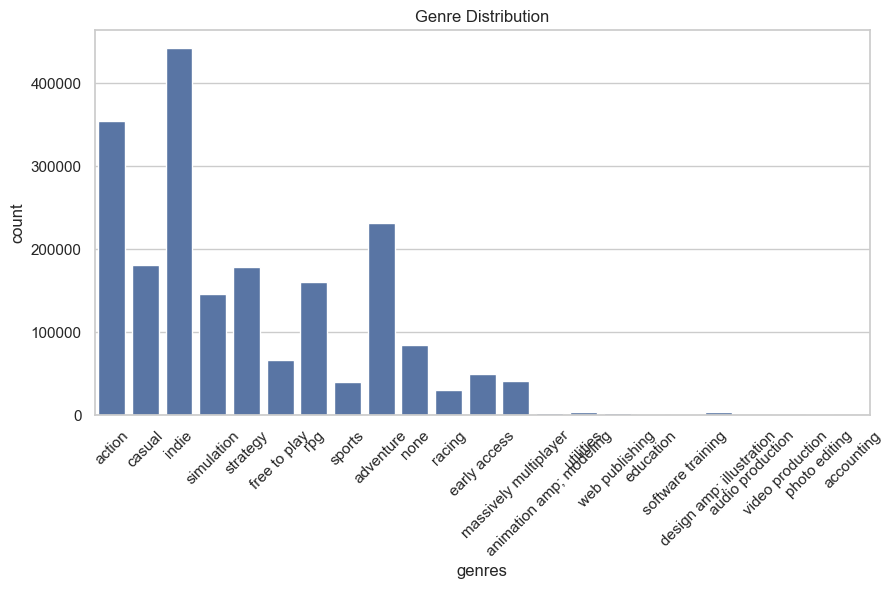

In [46]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 5))
sns.countplot(data=df_steam_games, x='genres')
plt.xticks(rotation=45)
plt.title('Distribución por género')
plt.show()

Boxplot de distribución por precio:

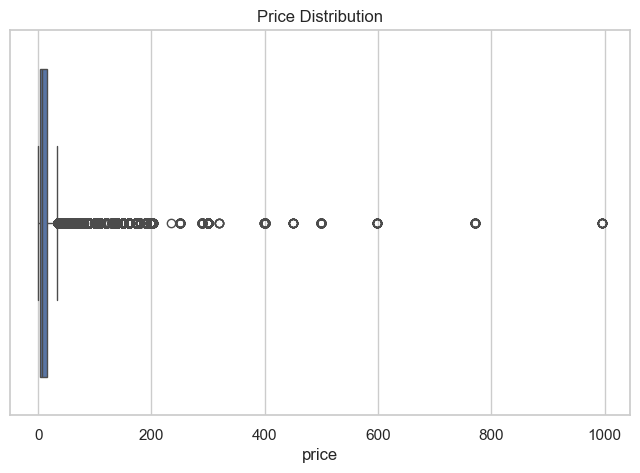

In [47]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df_steam_games, x='price')
plt.title('Distribución por precio')
plt.show()

Scatter Plot - Precio vs Año:

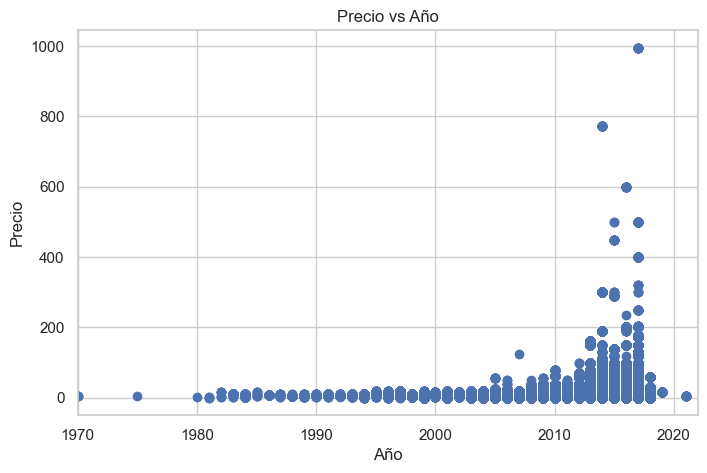

In [51]:
plt.figure(figsize=(8, 5))
plt.scatter(df_steam_games['anio'], df_steam_games['price'])
plt.xlabel('Año')
plt.xlim(1970, 2022)
plt.ylabel('Precio')
plt.title('Precio vs Año')
plt.show()

Wordcloud de géneros: 

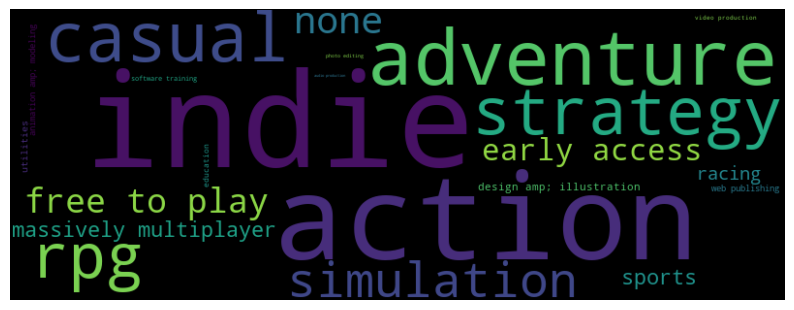

In [62]:
# Cuenta la frecuencia de cada género
frecuencia_de_genero = df_steam_games['genres'].value_counts()

# Crea la nube de palabras
wordcloud = WordCloud(width=800, height=300, background_color='black').generate_from_frequencies(frecuencia_de_genero)

# Muestra la nube de palabras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Wordcloud de tags: 

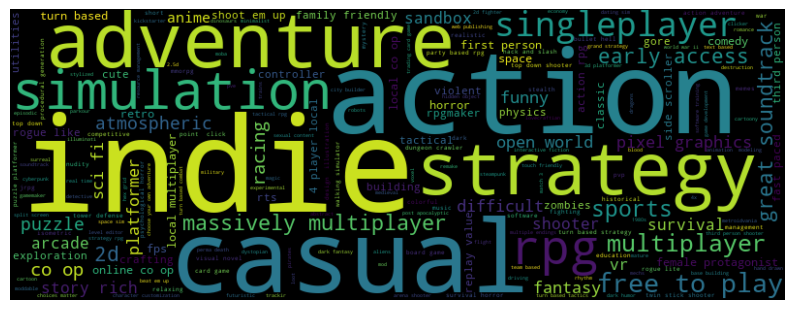

In [63]:
# Cuenta la frecuencia de cada tag
frecuencia_por_tag = df_steam_games['tags'].value_counts()

# Crea la nube de palabras
wordcloud = WordCloud(width=800, height=300, background_color='black').generate_from_frequencies(frecuencia_por_tag)

# Muestra la nube de palabras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Wordcloud de specs: 

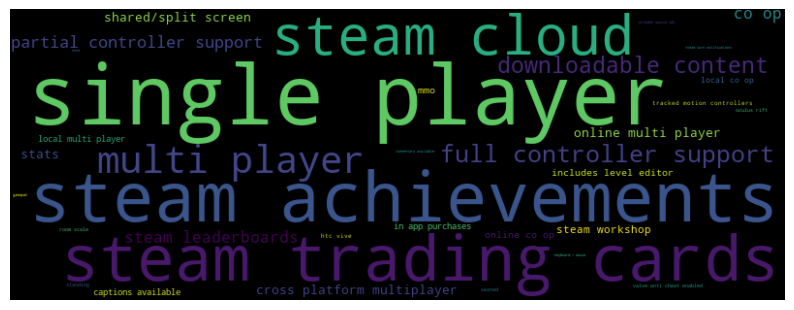

In [64]:
# Cuenta la frecuencia de cada specs
frecuencia_por_specs = df_steam_games['specs'].value_counts()

# Crea la nube de palabras
wordcloud = WordCloud(width=800, height=300, background_color='black').generate_from_frequencies(frecuencia_por_specs)

# Muestra la nube de palabras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Stacked Area Chart - Distribución de género a través del tiempo (entre los años 2000 y 2022):

<Figure size 1200x600 with 0 Axes>

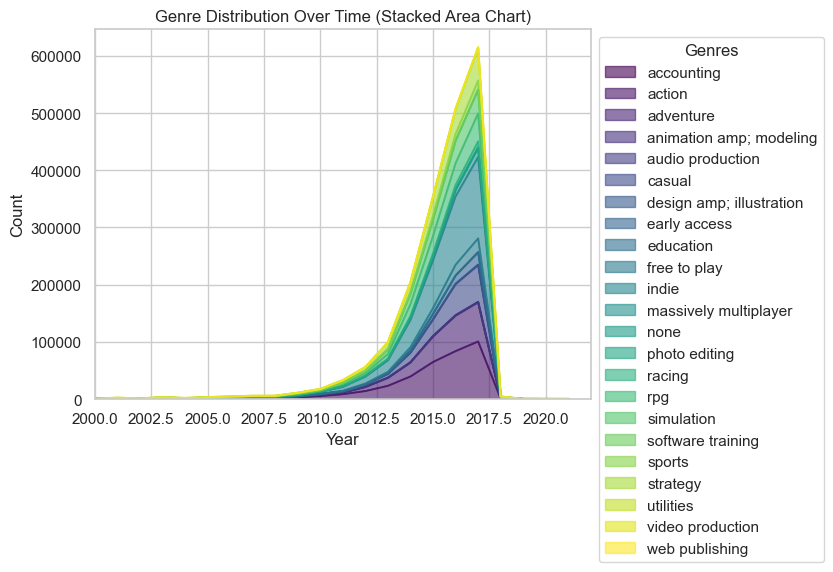

In [68]:
distribucion_de_genero = df_steam_games.groupby(['anio', 'genres']).size().unstack(fill_value=0)

plt.figure(figsize=(12, 6))
distribucion_de_genero.plot(kind='area', colormap='viridis', alpha=0.6)
plt.title('Distribución de género por año (Stacked Area Chart)')
plt.xlabel('Año')
plt.xlim(2000,2022)
plt.ylabel('Cantidad')
plt.legend(title='Genres', bbox_to_anchor=(1, 1))
plt.show()

<Figure size 1200x800 with 0 Axes>

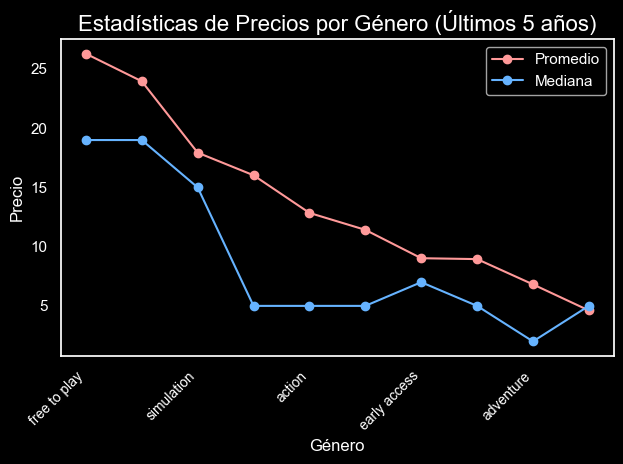

Estadísticas de Precios por Género (Últimos 5 años):

                   mean  median        std
genres                                    
free to play  26.276957   18.99  17.670327
sports        23.950000   18.99  18.484510
simulation    17.924491   14.99  17.186744
rpg           16.016471    4.99  20.001236
action        12.838369    4.99  17.040282
indie         11.408765    4.99  13.776192
early access   9.014823    6.99   5.953804
strategy       8.939660    4.99   7.983539
adventure      6.805633    1.99   6.652118
racing         4.603636    4.99   1.401260


In [76]:
# Filtra los datos para incluir solo los últimos 5 años y eliminar filas con precio nulo o 0
ultimos_5_anios = df_steam_games[(df_steam_games['anio'].astype(int) >= 2018) & (df_steam_games['price'].notnull()) & (df_steam_games['price'] > 0)]

# Calcula las estadísticas de precios por género
estadisticas_precio_por_genero = ultimos_5_anios.groupby('genres')['price'].agg(['mean', 'median', 'std'])

# Excluye las filas donde la desviación estándar es igual a 0
estadisticas_precio_por_genero = estadisticas_precio_por_genero[estadisticas_precio_por_genero['std'] > 0]

# Selecciona los 10 géneros con el promedio más alto
top_generos_estadisticas = estadisticas_precio_por_genero.sort_values(by='mean', ascending=False).head(10)

# Configura el estilo del gráfico
plt.style.use('dark_background')  # Fondo negro
plt.figure(figsize=(12, 8))

colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#c2c2f0', '#ffb3e6', '#c2f0c2', '#e6e6e6', '#ffdb4d', '#c2f0f0']

# Crea un gráfico de líneas para mostrar el promedio, la mediana y la media de precios por género
top_generos_estadisticas[['mean', 'median']].plot(kind='line', marker='o', color=colors)
plt.title('Estadísticas de Precios por Género (Últimos 5 años)', fontsize=16)
plt.xlabel('Género')
plt.ylabel('Precio')
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.legend(['Promedio', 'Mediana'])
plt.grid(False)
plt.tight_layout()
plt.show()

# Muestra las mismas estadísticas en forma de tabla
print("Estadísticas de Precios por Género (Últimos 5 años):\n")
print(top_generos_estadisticas)

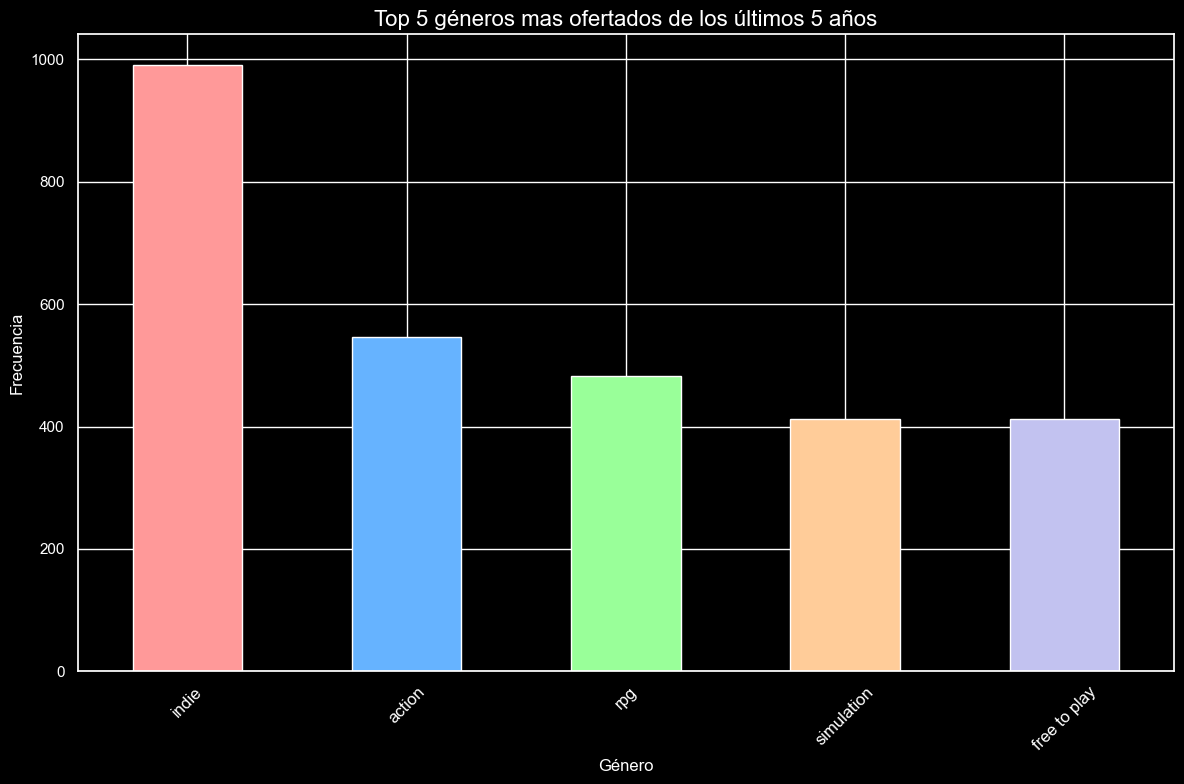

Top 5 géneros más ofertados de los últimos 5 años:

genres
indie           991
action          547
rpg             483
simulation      413
free to play    413
Name: count, dtype: int64


In [79]:
# Establece el estilo de fondo negro
plt.style.use('dark_background')

# Crea una figura con un eje
fig, ax = plt.subplots(figsize=(12, 8))

# Filtra los datos para incluir solo los últimos 5 años
ultimos_5_anios = df_steam_games[df_steam_games['anio'].astype(int) >= 2018]

# Cuenta la frecuencia de géneros
frecuencia_generos = ultimos_5_anios['genres'].value_counts()

# Selecciona los 5 géneros más repetidos
top_5_generos = frecuencia_generos.head(5)

# Crea un gráfico de barras utilizando la paleta de colores personalizada
top_5_generos.plot(kind='bar', color=colors, ax=ax)
ax.set_title('Top 5 géneros mas ofertados de los últimos 5 años', fontsize=16)
ax.set_xlabel('Género')
ax.set_ylabel('Frecuencia')
ax.tick_params(axis='x', rotation=45, labelsize=12)
plt.tight_layout()
plt.show()

# Filtra los datos para incluir solo los últimos 5 años
ultimos_5_anios = df_steam_games[df_steam_games['anio'].astype(int) >= 2018]

# Cuenta la frecuencia de géneros
frecuencia_generos = ultimos_5_anios['genres'].value_counts()

# Selecciona los 5 géneros más repetidos
top_5_generos = frecuencia_generos.head(5)

print("Top 5 géneros más ofertados de los últimos 5 años:\n")
print(top_5_generos)